In [1]:
# Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
# from pygam import GammaGAM, s

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# from xgboost import XGBRegressor

In [6]:
data =pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_superf_sat/02_data_proceed_OHG.csv")
data.head()
data.columns



Index(['Unnamed: 0', 'date', 'X.x', 'AOD_470', 'AOD_550', 'PM25',
       'temperatura', 'humedad', 'dirViento', 'velViento', 'estacion.x',
       'year', 'X.y', 'blh_mean', 'blh_min', 'blh_max', 'blh_sd',
       'blh_mean_subt', 'sp_mean', 'sp_min', 'sp_max', 'sp_sd', 'sp_mean_subt',
       'd2m_mean', 'd2m_min', 'd2m_max', 'd2m_sd', 'd2m_mean_subt', 't2m_mean',
       't2m_min', 't2m_max', 't2m_sd', 't2m_mean_subt', 'v10_mean', 'v10_min',
       'v10_max', 'v10_sd', 'v10_mean_subt', 'u10_mean', 'u10_min', 'u10_max',
       'u10_sd', 'u10_mean_subt', 'tp_mean', 'tp_min', 'tp_max', 'tp_sd',
       'tp_mean_subt', 'estacion.y'],
      dtype='object')

# 01. Regresion lineal simple

RMSE de la validación cruzada: 14.01
R2 de la validación cruzada: 0.02
RMSE en el conjunto de prueba: 14.73
R2 en el conjunto de prueba: 0.03
Coeficiente de AOD en la regresión lineal simple: 29.69890309471013
Intercepto: 20.160561583776243


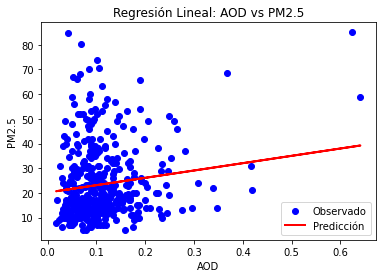

In [7]:
# Simulación de los datos
# Suponemos que tienes un DataFrame con las columnas AOD y PM2.5
# np.random.seed(0)
# data = pd.DataFrame({
#     'AOD_550': np.random.rand(100) * 0.5 + 0.1,  # Simulando datos de AOD
#     'PM2.5': np.random.rand(100) * 30 + 10   # Simulando datos de PM2.5
# })


# Separar las características (X) y la variable objetivo (y)
X = data[['AOD_550']]
y = data['PM25']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar validación cruzada con 5 folds
# métrica que se evaluará durante el proceso de validación cruzada o al entrenar un modelo. mean_squared_error (MSE)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_predictions = cross_val_predict(model, X_train, y_train, cv=5)

# Calcular el RMSE y R2 para los datos de entrenamiento
rmse_cv = np.sqrt(-cv_scores)
r2_cv = r2_score(y_train, cv_predictions)
mse_scores = -cv_scores
print(f'RMSE de la validación cruzada: {rmse_cv.mean():.2f}')
print(f'R2 de la validación cruzada: {r2_cv:.2f}')


# Predecir los valores de PM2.5 en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas para el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f'RMSE en el conjunto de prueba: {rmse_test:.2f}')
print(f'R2 en el conjunto de prueba: {r2_test:.2f}')
# Coeficiente y el intercepto
simple_coef = model.coef_[0]
simple_intercept = model.intercept_

print(f"Coeficiente de AOD en la regresión lineal simple: {simple_coef}")
print(f"Intercepto: {simple_intercept}")

# Gráfico de los valores observados vs predichos
plt.scatter(X_test, y_test, color='blue', label='Observado')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción')
plt.xlabel('AOD')
plt.ylabel('PM2.5')
plt.title('Regresión Lineal: AOD vs PM2.5')
plt.legend()
plt.show()


# 02. Regresion lineal multiple

MSE por cada pliegue de validación cruzada: [73.52769944 96.70607455 68.82286056 81.66199278 82.10625775]
MSE promedio: 80.56497701420349
MSE en el conjunto de prueba: 83.1913231223911
R^2 en el conjunto de prueba: 0.6267190688300521
Coeficientes de la regresión lineal múltiple:
   Variable  Coeficiente
0   AOD_550     4.451250
1  t2m_mean     4.901062
2  blh_mean    -5.480699
3   sp_mean    -0.490692
4  d2m_mean    -5.084728
5  v10_mean    -1.116392
6  u10_mean    -4.925634
7   tp_mean    -1.702433
Intercepto: 23.492211350696575


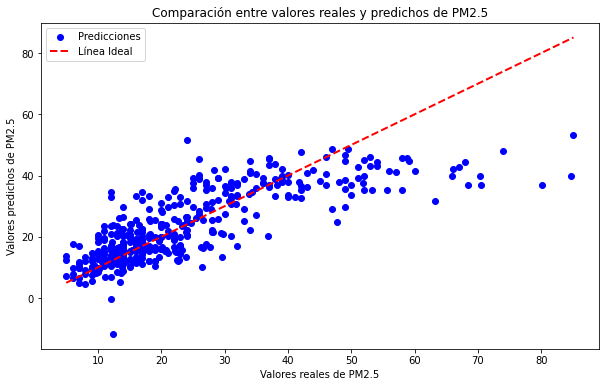

In [8]:
# Cargar datos
# Crear un DataFrame 
# data = pd.DataFrame({
#     'AOD_550': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
#     't2m_mean': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
#     'blh_mean': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
#     'sp_mean': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
#       'd2m_mean': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
#     'PM25': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
# })


# Index(['Unnamed: 0', 'date', 'X.x', 'AOD_470', 'AOD_550', 'PM25',
#        'temperatura', 'humedad', 'dirViento', 'velViento', 'estacion.x',
#        'year', 'X.y', 'blh_mean', 'blh_min', 'blh_max', 'blh_sd',
#        'blh_mean_subt', 'sp_mean', 'sp_min', 'sp_max', 'sp_sd', 'sp_mean_subt',
#        'd2m_mean', 'd2m_min', 'd2m_max', 'd2m_sd', 'd2m_mean_subt', 't2m_mean',
#        't2m_min', 't2m_max', 't2m_sd', 't2m_mean_subt', 'v10_mean', 'v10_min',
#        'v10_max', 'v10_sd', 'v10_mean_subt', 'u10_mean', 'u10_min', 'u10_max',
#        'u10_sd', 'u10_mean_subt', 'tp_mean', 'tp_min', 'tp_max', 'tp_sd',
#        'tp_mean_subt', 'estacion.y'],
#       dtype='object')

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD_550', 't2m_mean', 'blh_mean', 'sp_mean',"d2m_mean","v10_mean","u10_mean",'tp_mean']]
y = data['PM25']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables predictoras (opcional, pero recomendado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores negativos a positivos para interpretar el MSE
mse_scores = -cv_scores
print(f'MSE por cada pliegue de validación cruzada: {mse_scores}')
print(f'MSE promedio: {mse_scores.mean()}')

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE en el conjunto de prueba: {mse}')
print(f'R^2 en el conjunto de prueba: {r2}')


# Coeficientes del modelo de regresión lineal múltiple
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

# Intercepto
intercept = model.intercept_

print("Coeficientes de la regresión lineal múltiple:")
print(coefficients)
print(f"Intercepto: {intercept}")

# Crear un gráfico de dispersión para comparar los valores reales y predichos de PM2.5
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel('Valores reales de PM2.5')
plt.ylabel('Valores predichos de PM2.5')
plt.title('Comparación entre valores reales y predichos de PM2.5')
plt.legend()
plt.show()


# 03. Regresion lineal ridge

RMSE medio en validación cruzada: 9.07
MSE: 84.30
RMSE: 9.18
R²: 0.62
Coeficientes del modelo de regresión lineal Ridge:
   Variable  Coeficiente
0   AOD_550    64.749564
1  t2m_mean     1.147167
2  blh_mean    -0.032598
3   sp_mean    -0.002510
4  d2m_mean    -1.223431
5  v10_mean    -3.409005
6  u10_mean    -6.411916
7   tp_mean    -1.576935
Intercepto: 268.67838886087134


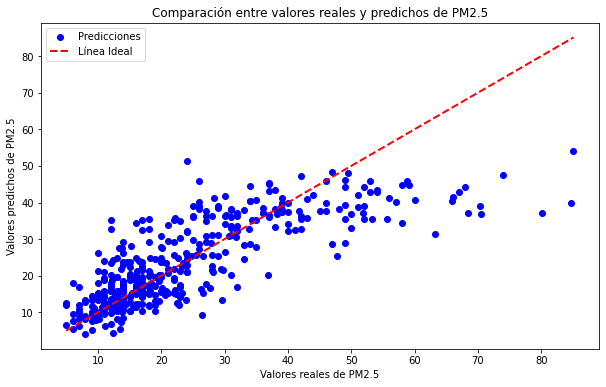

In [9]:
#Datos

# data = pd.DataFrame({
#     'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
#     'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
#     'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
#     'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
#     'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
# })
# X = data[['AOD', 'temperature', 'humidity', 'pressure']]
# y = data['PM2.5']


# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD_550', 't2m_mean', 'blh_mean', 'sp_mean',"d2m_mean","v10_mean","u10_mean",'tp_mean']]
y = data['PM25']


# Division de data set en train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Alfa (α) es el término de penalización que denota la cantidad de contracción (o restricción) que se aplicará en la ecuación. Con alfa ajustado a cero, encontrará que esto es 
#equivalente al modelo de regresión lineal y un valor mayor penaliza la función de optimización
# Segun Bagheri regularization parameter: 0.1
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Validación cruzada
scores = cross_val_score(ridge_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
# scores = cross_val_score(ridge_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE medio en validación cruzada: {rmse_scores.mean():.2f}")

# Predecir sobre el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': ridge_model.coef_
})

intercept = ridge_model.intercept_

print("Coeficientes del modelo de regresión lineal Ridge:")
print(coefficients)
print(f"Intercepto: {intercept}")

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel('Valores reales de PM2.5')
plt.ylabel('Valores predichos de PM2.5')
plt.title('Comparación entre valores reales y predichos de PM2.5')
plt.legend()
plt.show()

# 04. Regresion lineal LASSO

RMSE medio en validación cruzada: 9.24
MSE: 88.27
RMSE: 9.40
R²: 0.60
Coeficientes del modelo de regresión lineal Lasso:
   Variable  Coeficiente
0   AOD_550    38.535596
1  t2m_mean     0.833760
2  blh_mean    -0.037219
3   sp_mean    -0.004488
4  d2m_mean    -0.979462
5  v10_mean    -0.809463
6  u10_mean    -5.122520
7   tp_mean    -0.000000
Intercepto: 472.0864378657646


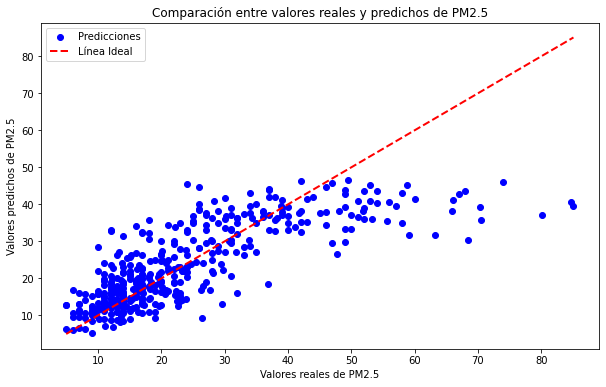

In [10]:
#Datos

# data = pd.DataFrame({
#     'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
#     'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
#     'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
#     'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
#     'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
# })
# X = data[['AOD', 'temperature', 'humidity', 'pressure']]
# y = data['PM2.5']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD_550', 't2m_mean', 'blh_mean', 'sp_mean',"d2m_mean","v10_mean","u10_mean",'tp_mean']]
y = data['PM25']


# Division de data set en train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Genero el modelo
#Regresion lineal lasso: regularization parameter: 0.1
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Validación cruzada
scores = cross_val_score(lasso_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE medio en validación cruzada: {rmse_scores.mean():.2f}")


# Predecir sobre el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lasso_model.coef_
})

intercept = lasso_model.intercept_

print("Coeficientes del modelo de regresión lineal Lasso:")
print(coefficients)
print(f"Intercepto: {intercept}")

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel('Valores reales de PM2.5')
plt.ylabel('Valores predichos de PM2.5')
plt.title('Comparación entre valores reales y predichos de PM2.5')
plt.legend()
plt.show()


# 05 GAM Generalized Additive Model
Falta la libreria, probar en r

In [ ]:
#Datos

data = pd.DataFrame({
    'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
    'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
    'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
    'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
    'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
})
X = data[['AOD', 'temperature', 'humidity', 'pressure']]
y = data['PM2.5']

# Division de data set en train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from pygam import LinearGAM, s

# Ajustar el modelo GAM
# Dentro de las s se pueden detallar que tipo de funciones de suavizado se pueden generar por ejemplo
# Ver en r
gam = LinearGAM(s(0) + s(1) + s(2) + s(3)).fit(X_train, y_train)

# Validación cruzada (utilizando el propio método de GAM para la validación)
scores = cross_val_score(gam, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE medio en validación cruzada: {rmse_scores.mean():.2f}")

# Predecir sobre el conjunto de prueba
y_pred = gam.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# En GAM, los coeficientes son las funciones suavizadas, no coeficientes simples.
# Para obtener una visión general de las funciones, puedes visualizar los efectos de las variables.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Plots for each smooth term
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    XX = np.linspace(X.iloc[:, i].min(), X.iloc[:, i].max(), 100)
    plt.plot(XX, gam.partial_dependence(XX, feature=i), label=X.columns[i])
    plt.title(f'Efecto de {X.columns[i]}')
    plt.xlabel(X.columns[i])
    plt.ylabel('Efecto')
    plt.legend()

plt.tight_layout()
plt.show()


# 06. SVR Support Vector Regression:

En el caso de SVR, no se obtienen coeficientes directos para las variables como en la regresión lineal. En cambio, SVR utiliza un conjunto de vectores de soporte para definir la función de predicción. Estos vectores de soporte son puntos en el espacio de características que tienen un impacto directo en la predicción del modelo. Para entender la importancia de cada característica en SVR, es posible utilizar técnicas de análisis de importancia de características o visualizar cómo el modelo responde a cambios en cada variable, pero no se obtienen coeficientes explícitos como en otros modelos de regresión.

In [11]:
#Datos

# data = pd.DataFrame({
#     'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
#     'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
#     'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
#     'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
#     'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
# })
# X = data[['AOD', 'temperature', 'humidity', 'pressure']]
# y = data['PM2.5']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD_550', 't2m_mean', 'blh_mean', 'sp_mean',"d2m_mean","v10_mean","u10_mean",'tp_mean']]
y = data['PM25']


# Division de data set en train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVR
#k puede ser:
# C:
# e
 # Tipos de kernel ('linear', 'poly', 'rbf', 'sigmoid')
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Ajustar el modelo
svr.fit(X_train, y_train)

# Validación cruzada (utilizando el propio método de SVR para la validación)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE medio en validación cruzada: {rmse_scores.mean():.2f}")

# Predecir sobre el conjunto de prueba
y_pred = svr.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE medio en validación cruzada: 14.89
MSE: 250.05
RMSE: 15.81
R²: -0.12


In [17]:
# Otreforma buscando los mejores hiperparametros
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

#Datos

# data = pd.DataFrame({
#     'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
#     'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
#     'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
#     'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
#     'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
# })
# X = data[['AOD', 'temperature', 'humidity', 'pressure']]
# y = data['PM2.5']


# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD_550', 't2m_mean', 'blh_mean']]#, 'sp_mean',"d2m_mean","v10_mean","u10_mean",'tp_mean']]
y = data['PM25']

# Division de data set en train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de hiperparámetros para GridSearchCV
# C controla la complejidad del modelo.
# kernel define la forma de la función de transformación.
# epsilon especifica la tolerancia para los errores de predicción.
param_grid = {
    'C': [0.1, 1],#, 10],#, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

# Crear el modelo SVR
svr = SVR()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

# Ajustar el GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {-grid_search.best_score_:.2f}")

# Usar el mejor modelo encontrado para predecir sobre el conjunto de prueba
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Mejores parámetros: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Mejor score: 94.79
MSE: 105.65
RMSE: 10.28
R²: 0.53


# 07. Random forest

Mean Cross-Validation MSE: 0.01
MSE: 0.00
RMSE: 0.04
R²: 1.00
       Feature  Importance
1  temperature    0.281716
0          AOD    0.258406
2     humidity    0.237707
3     pressure    0.222171


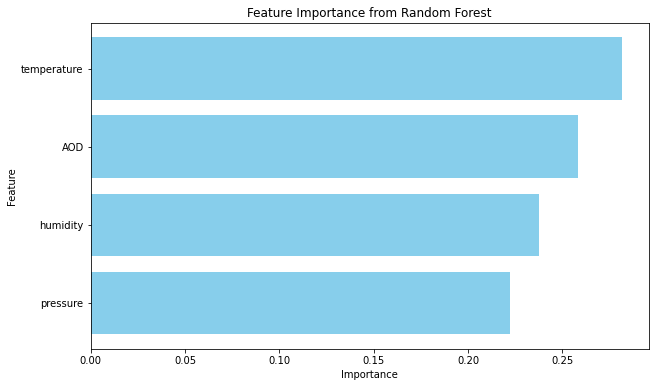

In [46]:
# Cargar datos
# Crear un DataFrame 
data = pd.DataFrame({
    'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
    'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
    'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
    'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
    'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
})

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD', 'temperature', 'humidity', 'pressure']]
y = data['PM2.5']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
# Random Forest No. of estimators: 500, max depth: 10, max features: 0.5, min samples in a leaf: 1, criterion: MSE
rf = RandomForestRegressor(n_estimators=100, random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print(f"Mean Cross-Validation MSE: {-cv_scores.mean():.2f}")

# Ajustar el modelo en los datos de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Obtener la importancia de las características
#Se calcula la importancia de cada característica y se muestra en un gráfico.
#Esto te ayuda a entender qué variables tienen más peso en la predicción de PM2.5.
importances = rf.feature_importances_
feature_names = X.columns

# Crear un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plotear la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que el más importante esté arriba
plt.show()

# 08. Extra trees

MSE: 0.00
RMSE: 0.00
R²: 1.00
Cross-Validation MSE: -0.00
Cross-Validation RMSE: 0.00


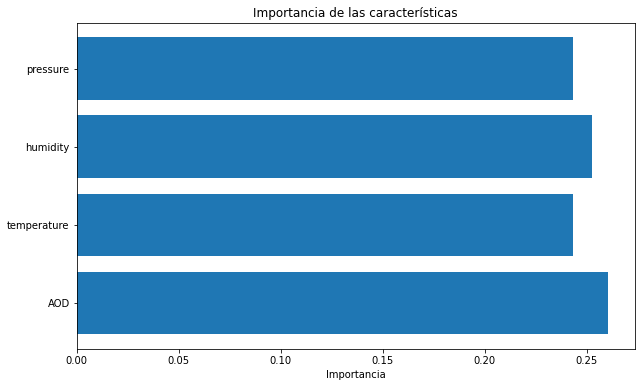

In [47]:
# Cargar datos
# Crear un DataFrame 
data = pd.DataFrame({
    'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
    'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
    'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
    'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
    'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
})

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD', 'temperature', 'humidity', 'pressure']]
y = data['PM2.5']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear y entrenar el modelo de Extra Trees Regressor con los parámetros especificados
# n_estimatorsNúmero de árboles en el bosque. Un número mayor puede aumentar el rendimiento del modelo, pero también aumenta el tiempo de computación.

# max_depth=10: Profundidad máxima de cada árbol. Limitar la profundidad ayuda a evitar el sobreajuste, especialmente en datos con mucho ruido.
# max_features=0.8: Fracción de características a considerar en cada división. Esto introduce diversidad entre los árboles y ayuda a reducir el sobreajuste.
# min_samples_leaf=1: Número mínimo de muestras que deben estar en una hoja. Un valor mayor puede ayudar a generalizar mejor y evitar el sobreajuste.
# criterion='mse': Criterio para medir la calidad de una división. Aquí se usa el error cuadrático medio (MSE).

model = ExtraTreesRegressor(
    n_estimators=500,
    max_depth=10,
    max_features=0.8,
    min_samples_leaf=1,
    criterion='mse',
    random_state=42
)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_rmse = cv_mse ** 0.5

print(f"Cross-Validation MSE: {cv_mse:.2f}")
print(f"Cross-Validation RMSE: {cv_rmse:.2f}")

# Importancia de las características
importances = model.feature_importances_
features = X.columns

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features, importances, align='center')
plt.xlabel('Importancia')
plt.title('Importancia de las características')
plt.show()


# 09. XGBoost

In [ ]:
# Cargar datos
# Crear un DataFrame 
data = pd.DataFrame({
    'AOD': [0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1,0.2, 0.4, 0.6, 0.8, 1.0, 0.3, 0.5, 0.7, 0.9, 1.1],
    'temperature': [18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27,18, 20, 22, 24, 26, 19, 21, 23, 25, 27],
    'humidity': [30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75,30, 40, 50, 60, 70, 35, 45, 55, 65, 75],
    'pressure': [1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023,1012, 1015, 1018, 1020, 1022, 1013, 1016, 1019, 1021, 1023],
    'PM2.5': [55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78,55, 60, 65, 70, 75, 58, 63, 68, 73, 78]
})

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['AOD', 'temperature', 'humidity', 'pressure']]
y = data['PM2.5']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Crear y entrenar el modelo XGBoost con los parámetros especificados
model = XGBRegressor(
    booster='gbtree',  # Tipo de booster: árbol de decisión
    n_estimators=2000,  # Número de árboles
    objective='reg:squarederror',  # Criterio: MSE
    learning_rate=0.3,  # Tasa de aprendizaje
    max_depth=6,  # Profundidad máxima de los árboles
    max_features=1,  # Fracción de características a considerar en cada división
    min_child_weight=1,  # Peso mínimo de las muestras en una hoja
    gamma=0,  # Reducción mínima de la pérdida requerida para una división
    random_state=42
)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_rmse = cv_mse ** 0.5

print(f"Cross-Validation MSE: {cv_mse:.2f}")
print(f"Cross-Validation RMSE: {cv_rmse:.2f}")

# Importancia de las características
importances = model.feature_importances_
features = X.columns

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features, importances, align='center')
plt.xlabel('Importancia')
plt.title('Importancia de las características')
plt.show()


# 10. Redes neuronales: LSTM and DFFNN

In [2]:
test_data =pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/modelos/ParticionDataSet/Modelo 1/M1_test.csv")
train_data=pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/modelos/ParticionDataSet/Modelo 1/M1_train.csv")
